In [1]:
import pandas as pd                 # Data tables
import os                           # Returns current directory, create files
import numpy as np                  # Arrays
import matplotlib.pyplot as plt	    # Graphs

from math import sqrt, atan, log, exp, sin, cos, tan

from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.optimize import *

from Heat_loads_solar_skylight_CLF_230318 import *

pd.options.display.max_columns = 999

# DATA

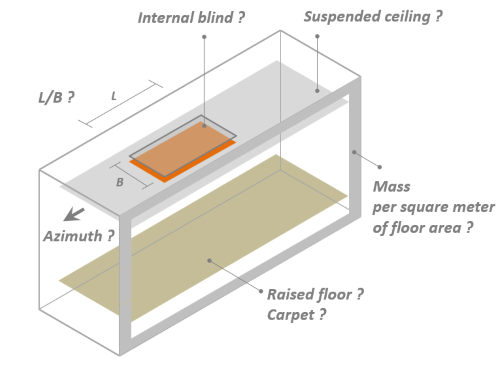

In [2]:
# Internal blind : 1 = True, 0 = False
internal_blind    = 0

# Wall thermal mass accessibility from internal side: 1 = True, 0 = False
suspended_ceiling = 1
raised_floor      = 0
carpet            = 0

# Average Specific mass per square meter of internal floor area, in [kg/m2] 
M_A               = 2087.7

# Azimuth of the window, in deg  (South = 0, West = 90, North = 180, East = -90)
azimuth_wd_deg    = 0

# Window proportional factor: ratio Length/Breadth
L_B               = 1

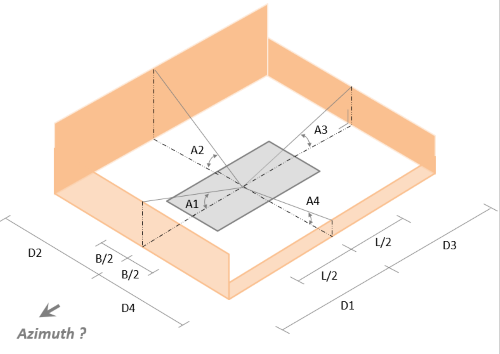

In [3]:
# Lateral screen on azimuth side: horizontal angle (deg) 
A1 = 45

# Screen distance from the window center divided by the window length, 0 means no screen
D1_L= 0.5

# Lateral screen on azimuth side + 90°: horizontal angle (deg) 
A2 = 0

# Screen distance from the window center divided by the window breadth, 0 means no screen
D2_B = 0

# Lateral screen on azimuth opposite side: horizontal angle (deg) 
A3 = 0

# Screen distance from the window center divided by the window length, 0 means no screen
D3_L = 0

# Lateral screen on azimuth side - 90°: horizontal angle (deg)
A4 = 30

# Screen distance from the window center divided by the window breadth, 0 means no screen
D4_B = 1

In [4]:
# Month comprised between 1 and 12
month = 7

# Daily Plant operating hours comprised between 0 and 24 h (0 to 24 h for continuous operating system)
hour_start_plant  = 0
hour_stop_plant   = 24

In [5]:
dfl, dfp, dfc, I_t_wd_day_max = CLF(internal_blind, suspended_ceiling, raised_floor, carpet, M_A, azimuth_wd_deg, \
            L_B, A1, D1_L, A2, D2_B, A3, D3_L, A4, D4_B, month, hour_start_plant, hour_stop_plant, method="LSODA")

# Default : method="LSODA"
# Other   :  method="Radau", method="RK45" 

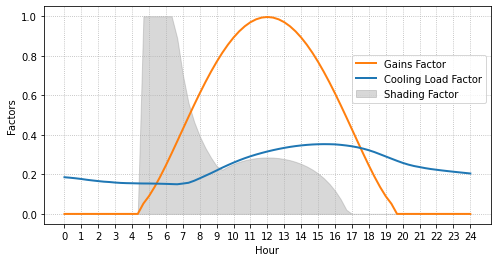

In [6]:
%matplotlib inline
plt.figure(figsize = (8,4))
plt.xticks(np.arange(0, dfl['hour_per'].values[-1] + 1 , 1))
plt.fill_between(dfl['hour_per'], 0*dfl['SF'], dfl['SF'], color= 'grey', alpha=.30, label="Shading Factor")
plt.plot(dfl['hour_per'], dfl['GF'], color= 'C1', linewidth=2.0, label="Gains Factor")
plt.plot(dfl['hour_per'], dfl['CLF'], color= 'C0', linewidth=2.0, label="Cooling Load Factor")
plt.xlabel('Hour')
plt.ylabel('Factors')
plt.legend(bbox_to_anchor=(1, 0.8))
plt.grid(linestyle= 'dotted')

In [7]:
dfp.T

hour_per,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
CLF,0.19,0.18,0.17,0.16,0.16,0.15,0.15,0.15,0.18,0.22,0.26,0.29,0.32,0.33,0.35,0.35,0.35,0.34,0.32,0.29,0.26,0.24,0.22,0.21,0.2


In [8]:
print("Maximum solar intensity on window for the considered month         :", round(I_t_wd_day_max,1), "(W/m2)")

Maximum solar intensity on window for the considered month         : 905.0 (W/m2)


In [9]:
dfc.T.to_clipboard(index=False)